In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris.feature_names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['target'] = iris.target
df.sample(5)

df0 = df[df['target'] == 0]

df1= df[df['target'] == 1]

df2 = df[df['target'] == 2]

df['flower'] = df.target.apply(lambda x: iris.target_names[x])
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
136,6.3,3.4,5.6,2.4,2,virginica
27,5.2,3.5,1.5,0.2,0,setosa
24,4.8,3.4,1.9,0.2,0,setosa
108,6.7,2.5,5.8,1.8,2,virginica
20,5.4,3.4,1.7,0.2,0,setosa


In [5]:
X = df.drop(['target', 'flower'], axis='columns')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

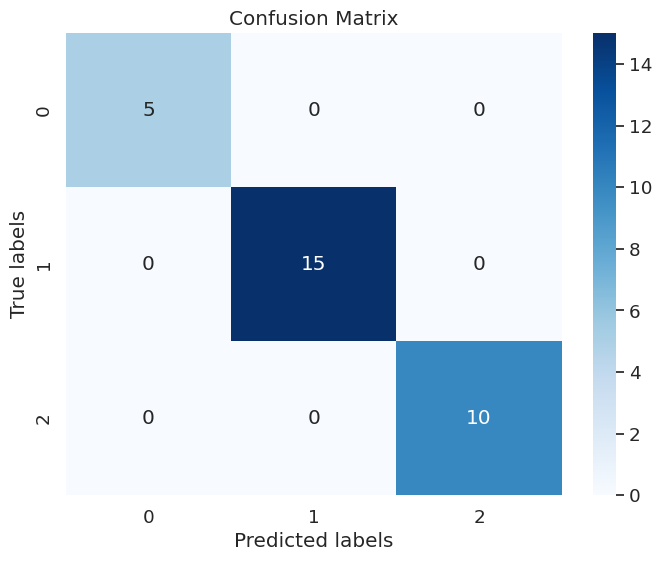

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()